
### Flights Delayes analysis

The data was gathered from the Buerue of Transportation Statistics. The [data set](https://transtats.bts.gov/ftproot/TranStatsData/72480919_122021_5245_airline_delay_causes.zip) includes data from 2002 to 2021. The data set includes the following information:
* Date
* Airports
* Carrier Name
* Flights Arrival
* Different reasons for delays for the flight

Questions:
* Did the number of flights cancelled over the years, which year was the most flights cancelled?
* Did the number of flights taken increase over the years?



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Import the flight delay csv file
flights_csv = pd.read_csv('airline_delay_causes.csv', sep=',')
data = [row for row in flights_csv]
flights_csv

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,BRW,"Barrow, AK: Wiley Post/Will Rogers Memorial",65.0,14.0,3.61,1.06,...,6.19,0.0,1.0,920.0,592.0,34.0,78.0,0.0,216.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,BUR,"Burbank, CA: Bob Hope",85.0,5.0,1.00,0.00,...,0.98,0.0,0.0,134.0,25.0,0.0,70.0,0.0,39.0,NaN
2,2009,11,AS,Alaska Airlines Inc.,CDV,"Cordova, AK: Merle K Mudhole Smith",58.0,8.0,2.04,1.00,...,2.96,4.0,2.0,586.0,174.0,37.0,62.0,0.0,313.0,NaN
3,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
4,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312618,2018,11,DL,Delta Air Lines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",131.0,21.0,7.00,1.06,...,7.87,0.0,0.0,1261.0,284.0,39.0,135.0,0.0,803.0,NaN
312619,2018,11,DL,Delta Air Lines Inc.,TLH,"Tallahassee, FL: Tallahassee International",141.0,26.0,7.89,0.82,...,11.75,0.0,2.0,977.0,193.0,42.0,153.0,0.0,589.0,NaN
312620,2018,11,DL,Delta Air Lines Inc.,TPA,"Tampa, FL: Tampa International",873.0,204.0,62.57,11.66,...,55.21,2.0,1.0,9053.0,3249.0,629.0,2351.0,0.0,2824.0,NaN
312621,2018,11,DL,Delta Air Lines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",31.0,3.0,2.54,0.00,...,0.43,0.0,1.0,206.0,190.0,0.0,3.0,0.0,13.0,NaN


In [4]:
# Get a rough understanding the data set
flights_csv.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,312623.000000,312623.000000,312139.000000,311910.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,312139.000000,0.0
mean,2012.246585,6.572197,382.506188,72.954064,20.900901,2.629526,24.151743,0.177285,25.041144,7.141360,0.871170,4204.209935,1272.384681,221.150721,1106.559741,7.140530,1596.971945,NaN
std,5.530480,3.445215,1028.276514,199.280229,47.185094,9.999853,85.569160,0.842577,75.496488,37.148506,3.934991,12524.056745,3464.838929,861.623728,4666.729409,38.723489,4932.144645,NaN
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,NaN
25%,2007.000000,4.000000,59.000000,9.000000,3.020000,0.000000,1.740000,0.000000,1.660000,0.000000,0.000000,439.000000,149.000000,0.000000,58.000000,0.000000,80.000000,NaN
50%,2012.000000,7.000000,120.000000,23.000000,8.210000,0.590000,5.580000,0.000000,5.940000,1.000000,0.000000,1208.000000,437.000000,25.000000,206.000000,0.000000,355.000000,NaN
75%,2018.000000,10.000000,274.000000,56.000000,19.610000,2.020000,15.470000,0.000000,17.110000,4.000000,1.000000,3083.000000,1094.000000,160.000000,606.000000,0.000000,1114.000000,NaN
max,2021.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000,NaN


In [5]:
# Print the array of columns and the index array
# pd.array(flights_csv)
print(flights_csv.columns)

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')


In [6]:
# pd.pivot_table(flights_csv)
# Pivot table showing the number of the flights canclled at specific airport given the number of flights 
pivot = pd.pivot_table(flights_csv, values = "arr_cancelled" , index = ["airport"], columns = ["arr_flights"])
pivot

arr_flights,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,21550.0,21589.0,21623.0,21648.0,21681.0,21688.0,21839.0,21873.0,21931.0,21977.0
airport,,,,,,,,,,,,,,,,,,,,,
ABE,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.166667,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABI,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABQ,0.0,0.0,0.0,0.2,0.166667,0.0,0.166667,0.363636,0.153846,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABR,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YKM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# For all the delays how many were due to weather
flights_csv.groupby(['airport', ' arr_delay'], as_index=False)['weather_delay'].max()

,airport,arr_delay,weather_delay
0,ABE,0.0,0.0
1,ABE,15.0,0.0
2,ABE,16.0,0.0
3,ABE,17.0,5.0
4,ABE,18.0,0.0
...,...,...,...
254379,YUM,3007.0,52.0
254380,YUM,3402.0,0.0
254381,YUM,3479.0,555.0
254382,YUM,3525.0,0.0


Text(0.5, 1.0, 'Number of Flights Cancelled since 2002 to Preset')

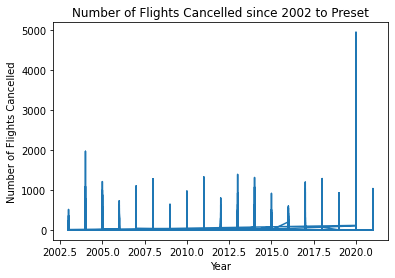

In [8]:
# Chart for flights cancelled over the years
x = flights_csv['year']
y = flights_csv['arr_cancelled']
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Number of Flights Cancelled")
plt.title("Number of Flights Cancelled since 2002 to Preset")

Text(0.5, 1.0, 'Number of Flights Delayed since 2002 to Preset')

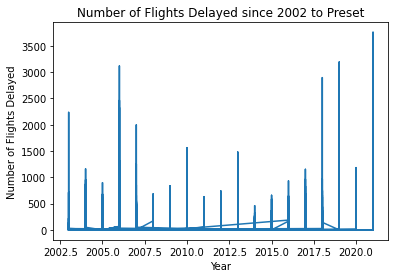

In [9]:
# Chart for flights delayed because of security over the years
x1 = flights_csv['year']
y1 = flights_csv['security_delay']
plt.plot(x1,y1)
plt.xlabel("Year")
plt.ylabel("Number of Flights Delayed")
plt.title("Number of Flights Delayed since 2002 to Preset")

## Analysis 

* The numbers of flights cancelled over the years, specifically in 2021 increased. Which might be caused by the Covid-19 Pandemic
* Similarly the number of flights delayed because of security reasons also drastically increased around the same time as the Covid-19 Pandemic